In [2]:
#Import Dependies
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
#Model Building
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils

In [4]:
#Function for Keypoint detection
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image) 
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
#Function for drawing keypoints onto the image
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
#Testing of Model using open CV
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
    
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

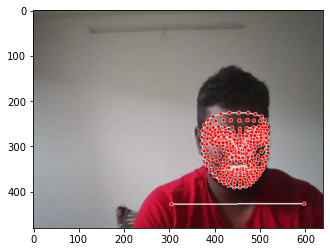

In [7]:
draw_landmarks(frame,results)
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [9]:
#Function for extracting keypoints
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [10]:
result_test = extract_keypoints(results)
result_test

array([ 0.71006066,  0.65246004, -1.6314131 , ...,  0.        ,
        0.        ,  0.        ])

In [11]:
#Creating data paths
DATA_PATH = os.path.join('MP_Data') 
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30
start_folder = 30

In [12]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [13]:
#Extracting images for test and training
cap = cv2.VideoCapture(0) 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    for action in actions:
        
        for sequence in range(no_sequences):
           
            for frame_num in range(sequence_length):

               
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                draw_styled_landmarks(image, results)
   
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()


In [ ]:
cap.release()
cv2.destroyAllWindows()


In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [16]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [17]:
#Creating folders for 
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [20]:
np.array(sequences).shape
np.array(labels).shape
X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
y_test.shape

(5, 3)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [22]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [37]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [38]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 2s/step - loss: 3.6024 - categorical_accuracy: 0.2545
Epoch 2/2000
3/3 [==============================] - 0s 60ms/step - loss: 26.9131 - categorical_accuracy: 0.2760
Epoch 3/2000
3/3 [==============================] - 0s 60ms/step - loss: 64.6246 - categorical_accuracy: 0.3229
Epoch 4/2000
3/3 [==============================] - 0s 58ms/step - loss: 14.0097 - categorical_accuracy: 0.3406
Epoch 5/2000
3/3 [==============================] - 0s 56ms/step - loss: 25.9529 - categorical_accuracy: 0.2700
Epoch 6/2000
3/3 [==============================] - 0s 50ms/step - loss: 58.8431 - categorical_accuracy: 0.3053
Epoch 7/2000
3/3 [==============================] - 0s 56ms/step - loss: 35.3005 - categorical_accuracy: 0.3268
Epoch 8/2000
3/3 [==============================] - 0s 52ms/step - loss: 64.6985 - categorical_accuracy: 0.3111
Epoch 9/2000
3/3 [==============================] - 0s 55ms/step - loss: 83.5549 - categorical_accuracy: 0.

3/3 [==============================] - 0s 39ms/step - loss: 131.5832 - categorical_accuracy: 0.3483
Epoch 145/2000
3/3 [==============================] - 0s 47ms/step - loss: 177.2557 - categorical_accuracy: 0.3170
Epoch 146/2000
3/3 [==============================] - 0s 39ms/step - loss: 178.6737 - categorical_accuracy: 0.3425
Epoch 147/2000
3/3 [==============================] - 0s 47ms/step - loss: 227.5316 - categorical_accuracy: 0.3150
Epoch 148/2000
3/3 [==============================] - 0s 38ms/step - loss: 119.1682 - categorical_accuracy: 0.3190
Epoch 149/2000
3/3 [==============================] - 0s 48ms/step - loss: 106.5823 - categorical_accuracy: 0.4266
Epoch 150/2000
3/3 [==============================] - 0s 46ms/step - loss: 148.0358 - categorical_accuracy: 0.3366
Epoch 151/2000
3/3 [==============================] - 0s 42ms/step - loss: 213.9070 - categorical_accuracy: 0.2622
Epoch 152/2000
3/3 [==============================] - 0s 48ms/step - loss: 96.2936 - categorica

3/3 [==============================] - 0s 48ms/step - loss: 38.8066 - categorical_accuracy: 0.3757
Epoch 287/2000
3/3 [==============================] - 0s 38ms/step - loss: 46.1236 - categorical_accuracy: 0.3053
Epoch 288/2000
3/3 [==============================] - 0s 47ms/step - loss: 55.5455 - categorical_accuracy: 0.3131
Epoch 289/2000
3/3 [==============================] - 0s 40ms/step - loss: 27.5832 - categorical_accuracy: 0.3365
Epoch 290/2000
3/3 [==============================] - 0s 44ms/step - loss: 51.9879 - categorical_accuracy: 0.3150
Epoch 291/2000
3/3 [==============================] - 0s 40ms/step - loss: 27.6857 - categorical_accuracy: 0.3699
Epoch 292/2000
3/3 [==============================] - 0s 38ms/step - loss: 15.0182 - categorical_accuracy: 0.3933
Epoch 293/2000
3/3 [==============================] - 0s 41ms/step - loss: 14.9213 - categorical_accuracy: 0.3229
Epoch 294/2000
3/3 [==============================] - 0s 38ms/step - loss: 15.4956 - categorical_accura

3/3 [==============================] - 0s 39ms/step - loss: 25.6061 - categorical_accuracy: 0.3601
Epoch 359/2000
3/3 [==============================] - 0s 42ms/step - loss: 38.3461 - categorical_accuracy: 0.2270
Epoch 360/2000
3/3 [==============================] - 0s 39ms/step - loss: 23.7867 - categorical_accuracy: 0.3229
Epoch 361/2000
3/3 [==============================] - 0s 46ms/step - loss: 27.7174 - categorical_accuracy: 0.2446
Epoch 362/2000
3/3 [==============================] - 0s 40ms/step - loss: 24.5886 - categorical_accuracy: 0.3444
Epoch 363/2000
3/3 [==============================] - 0s 48ms/step - loss: 28.8377 - categorical_accuracy: 0.2603
Epoch 364/2000
3/3 [==============================] - 0s 38ms/step - loss: 14.3632 - categorical_accuracy: 0.3014
Epoch 365/2000
3/3 [==============================] - 0s 44ms/step - loss: 10.5898 - categorical_accuracy: 0.3640
Epoch 366/2000
3/3 [==============================] - 0s 39ms/step - loss: 10.5435 - categorical_accura

3/3 [==============================] - 0s 40ms/step - loss: 6.6268 - categorical_accuracy: 0.3307
Epoch 503/2000
3/3 [==============================] - 0s 39ms/step - loss: 8.9337 - categorical_accuracy: 0.3366
Epoch 504/2000
3/3 [==============================] - 0s 42ms/step - loss: 6.6736 - categorical_accuracy: 0.4403
Epoch 505/2000
3/3 [==============================] - 0s 41ms/step - loss: 10.8388 - categorical_accuracy: 0.4011
Epoch 506/2000
3/3 [==============================] - 0s 43ms/step - loss: 8.0236 - categorical_accuracy: 0.3835
Epoch 507/2000
3/3 [==============================] - 0s 42ms/step - loss: 7.9382 - categorical_accuracy: 0.3307
Epoch 508/2000
3/3 [==============================] - 0s 38ms/step - loss: 7.3177 - categorical_accuracy: 0.3444
Epoch 509/2000
3/3 [==============================] - 0s 45ms/step - loss: 8.3130 - categorical_accuracy: 0.2760
Epoch 510/2000
3/3 [==============================] - 0s 47ms/step - loss: 9.8482 - categorical_accuracy: 0.33

3/3 [==============================] - 0s 39ms/step - loss: 4.4432 - categorical_accuracy: 0.4286
Epoch 647/2000
3/3 [==============================] - 0s 43ms/step - loss: 3.4488 - categorical_accuracy: 0.4129
Epoch 648/2000
3/3 [==============================] - 0s 42ms/step - loss: 2.4003 - categorical_accuracy: 0.4461
Epoch 649/2000
3/3 [==============================] - 0s 38ms/step - loss: 3.1898 - categorical_accuracy: 0.4148
Epoch 650/2000
3/3 [==============================] - 0s 43ms/step - loss: 2.5852 - categorical_accuracy: 0.4011
Epoch 651/2000
3/3 [==============================] - 0s 38ms/step - loss: 3.4236 - categorical_accuracy: 0.3954
Epoch 652/2000
3/3 [==============================] - 0s 45ms/step - loss: 2.7787 - categorical_accuracy: 0.4442
Epoch 653/2000
3/3 [==============================] - 0s 40ms/step - loss: 2.7905 - categorical_accuracy: 0.4403
Epoch 654/2000
3/3 [==============================] - 0s 38ms/step - loss: 4.6451 - categorical_accuracy: 0.348

3/3 [==============================] - 0s 46ms/step - loss: 4.3577 - categorical_accuracy: 0.3718
Epoch 791/2000
3/3 [==============================] - 0s 37ms/step - loss: 4.4005 - categorical_accuracy: 0.3777
Epoch 792/2000
3/3 [==============================] - 0s 49ms/step - loss: 4.8290 - categorical_accuracy: 0.4971
Epoch 793/2000
3/3 [==============================] - 0s 50ms/step - loss: 4.0566 - categorical_accuracy: 0.4129
Epoch 794/2000
3/3 [==============================] - 0s 42ms/step - loss: 4.4626 - categorical_accuracy: 0.4795
Epoch 795/2000
3/3 [==============================] - 0s 38ms/step - loss: 4.5879 - categorical_accuracy: 0.4560
Epoch 796/2000
3/3 [==============================] - 0s 44ms/step - loss: 3.4851 - categorical_accuracy: 0.4305
Epoch 797/2000
3/3 [==============================] - 0s 40ms/step - loss: 2.5580 - categorical_accuracy: 0.4110
Epoch 798/2000
3/3 [==============================] - 0s 46ms/step - loss: 2.9093 - categorical_accuracy: 0.501

3/3 [==============================] - 0s 43ms/step - loss: 5.0596 - categorical_accuracy: 0.3895
Epoch 935/2000
3/3 [==============================] - 0s 41ms/step - loss: 1.7915 - categorical_accuracy: 0.5695
Epoch 936/2000
3/3 [==============================] - 0s 47ms/step - loss: 3.1505 - categorical_accuracy: 0.4893
Epoch 937/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.9318 - categorical_accuracy: 0.5655
Epoch 938/2000
3/3 [==============================] - 0s 47ms/step - loss: 2.4341 - categorical_accuracy: 0.5245
Epoch 939/2000
3/3 [==============================] - 0s 42ms/step - loss: 3.1515 - categorical_accuracy: 0.4462
Epoch 940/2000
3/3 [==============================] - 0s 39ms/step - loss: 1.8879 - categorical_accuracy: 0.5068
Epoch 941/2000
3/3 [==============================] - 0s 47ms/step - loss: 2.6238 - categorical_accuracy: 0.4618
Epoch 942/2000
3/3 [==============================] - 0s 42ms/step - loss: 4.2875 - categorical_accuracy: 0.342

3/3 [==============================] - 0s 42ms/step - loss: 1.5301 - categorical_accuracy: 0.5597
Epoch 1079/2000
3/3 [==============================] - 0s 39ms/step - loss: 0.8725 - categorical_accuracy: 0.7103
Epoch 1080/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.3516 - categorical_accuracy: 0.6086
Epoch 1081/2000
3/3 [==============================] - 0s 41ms/step - loss: 2.0838 - categorical_accuracy: 0.4971
Epoch 1082/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.8990 - categorical_accuracy: 0.6028
Epoch 1083/2000
3/3 [==============================] - 0s 42ms/step - loss: 2.2252 - categorical_accuracy: 0.5264
Epoch 1084/2000
3/3 [==============================] - 0s 47ms/step - loss: 3.1081 - categorical_accuracy: 0.4795
Epoch 1085/2000
3/3 [==============================] - 0s 36ms/step - loss: 2.4953 - categorical_accuracy: 0.5576
Epoch 1086/2000
3/3 [==============================] - 0s 43ms/step - loss: 3.4987 - categorical_accurac

3/3 [==============================] - 0s 43ms/step - loss: 3.2322 - categorical_accuracy: 0.5538
Epoch 1151/2000
3/3 [==============================] - 0s 39ms/step - loss: 2.0629 - categorical_accuracy: 0.5812
Epoch 1152/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.8883 - categorical_accuracy: 0.6086
Epoch 1153/2000
3/3 [==============================] - 0s 42ms/step - loss: 1.7484 - categorical_accuracy: 0.6673
Epoch 1154/2000
3/3 [==============================] - 0s 38ms/step - loss: 2.8466 - categorical_accuracy: 0.6517
Epoch 1155/2000
3/3 [==============================] - 0s 44ms/step - loss: 1.9180 - categorical_accuracy: 0.6771
Epoch 1156/2000
3/3 [==============================] - 0s 40ms/step - loss: 3.0428 - categorical_accuracy: 0.5734
Epoch 1157/2000
3/3 [==============================] - 0s 38ms/step - loss: 2.5730 - categorical_accuracy: 0.5929
Epoch 1158/2000
3/3 [==============================] - 0s 40ms/step - loss: 2.6108 - categorical_accurac

3/3 [==============================] - 0s 46ms/step - loss: 7.3061 - categorical_accuracy: 0.3248
Epoch 1293/2000
3/3 [==============================] - 0s 41ms/step - loss: 9.5962 - categorical_accuracy: 0.3347
Epoch 1294/2000
3/3 [==============================] - 0s 47ms/step - loss: 9.4180 - categorical_accuracy: 0.3151
Epoch 1295/2000
3/3 [==============================] - 0s 42ms/step - loss: 5.7770 - categorical_accuracy: 0.3483
Epoch 1296/2000
3/3 [==============================] - 0s 47ms/step - loss: 9.3046 - categorical_accuracy: 0.4031
Epoch 1297/2000
3/3 [==============================] - 0s 42ms/step - loss: 14.7370 - categorical_accuracy: 0.3209
Epoch 1298/2000
3/3 [==============================] - 0s 47ms/step - loss: 11.2561 - categorical_accuracy: 0.3953
Epoch 1299/2000
3/3 [==============================] - 0s 41ms/step - loss: 16.9628 - categorical_accuracy: 0.2897
Epoch 1300/2000
3/3 [==============================] - 0s 44ms/step - loss: 15.1363 - categorical_acc

Epoch 1435/2000
3/3 [==============================] - 0s 49ms/step - loss: 8.9672 - categorical_accuracy: 0.3718
Epoch 1436/2000
3/3 [==============================] - 0s 47ms/step - loss: 5.7462 - categorical_accuracy: 0.3581
Epoch 1437/2000
3/3 [==============================] - 0s 50ms/step - loss: 6.8510 - categorical_accuracy: 0.3073
Epoch 1438/2000
3/3 [==============================] - 0s 47ms/step - loss: 9.1759 - categorical_accuracy: 0.3366
Epoch 1439/2000
3/3 [==============================] - 0s 45ms/step - loss: 2.4178 - categorical_accuracy: 0.3895
Epoch 1440/2000
3/3 [==============================] - 0s 45ms/step - loss: 4.0767 - categorical_accuracy: 0.3288
Epoch 1441/2000
3/3 [==============================] - 0s 43ms/step - loss: 3.5622 - categorical_accuracy: 0.3914
Epoch 1442/2000
3/3 [==============================] - 0s 39ms/step - loss: 3.5446 - categorical_accuracy: 0.3875
Epoch 1443/2000
3/3 [==============================] - 0s 55ms/step - loss: 5.3586 - cat

Epoch 1578/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.3222 - categorical_accuracy: 0.3366
Epoch 1579/2000
3/3 [==============================] - 0s 39ms/step - loss: 2.9911 - categorical_accuracy: 0.3327
Epoch 1580/2000
3/3 [==============================] - 0s 48ms/step - loss: 2.8235 - categorical_accuracy: 0.3014
Epoch 1581/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.6850 - categorical_accuracy: 0.4227
Epoch 1582/2000
3/3 [==============================] - 0s 45ms/step - loss: 1.5512 - categorical_accuracy: 0.3699
Epoch 1583/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.8540 - categorical_accuracy: 0.3581
Epoch 1584/2000
3/3 [==============================] - 0s 40ms/step - loss: 1.8667 - categorical_accuracy: 0.3249
Epoch 1585/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.5165 - categorical_accuracy: 0.2779
Epoch 1586/2000
3/3 [==============================] - 0s 46ms/step - loss: 1.2586 - cat

3/3 [==============================] - 0s 40ms/step - loss: 1.4944 - categorical_accuracy: 0.3640
Epoch 1722/2000
3/3 [==============================] - 0s 43ms/step - loss: 1.2989 - categorical_accuracy: 0.4031
Epoch 1723/2000
3/3 [==============================] - 0s 38ms/step - loss: 2.0680 - categorical_accuracy: 0.3444
Epoch 1724/2000
3/3 [==============================] - 0s 41ms/step - loss: 2.3041 - categorical_accuracy: 0.3659
Epoch 1725/2000
3/3 [==============================] - 0s 47ms/step - loss: 2.8383 - categorical_accuracy: 0.3640
Epoch 1726/2000
3/3 [==============================] - 0s 52ms/step - loss: 1.7758 - categorical_accuracy: 0.3835
Epoch 1727/2000
3/3 [==============================] - 0s 48ms/step - loss: 2.0551 - categorical_accuracy: 0.4032
Epoch 1728/2000
3/3 [==============================] - 0s 39ms/step - loss: 1.4516 - categorical_accuracy: 0.4677
Epoch 1729/2000
3/3 [==============================] - 0s 47ms/step - loss: 1.7513 - categorical_accurac

3/3 [==============================] - 0s 48ms/step - loss: 4.4468 - categorical_accuracy: 0.4070
Epoch 1794/2000
3/3 [==============================] - 0s 46ms/step - loss: 4.2407 - categorical_accuracy: 0.3073
Epoch 1795/2000
3/3 [==============================] - 0s 38ms/step - loss: 4.4221 - categorical_accuracy: 0.2545
Epoch 1796/2000
3/3 [==============================] - 0s 41ms/step - loss: 3.8526 - categorical_accuracy: 0.4208
Epoch 1797/2000
3/3 [==============================] - 0s 48ms/step - loss: 5.6701 - categorical_accuracy: 0.3073
Epoch 1798/2000
3/3 [==============================] - 0s 47ms/step - loss: 3.2157 - categorical_accuracy: 0.2426
Epoch 1799/2000
3/3 [==============================] - 0s 40ms/step - loss: 4.8439 - categorical_accuracy: 0.3307
Epoch 1800/2000
3/3 [==============================] - 0s 48ms/step - loss: 3.4027 - categorical_accuracy: 0.3894
Epoch 1801/2000
3/3 [==============================] - 0s 44ms/step - loss: 3.5758 - categorical_accurac

3/3 [==============================] - 0s 50ms/step - loss: 2.1638 - categorical_accuracy: 0.4168
Epoch 1866/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.8940 - categorical_accuracy: 0.3327
Epoch 1867/2000
3/3 [==============================] - 0s 54ms/step - loss: 3.1329 - categorical_accuracy: 0.4383
Epoch 1868/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.1042 - categorical_accuracy: 0.3210
Epoch 1869/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.7113 - categorical_accuracy: 0.3210
Epoch 1870/2000
3/3 [==============================] - 0s 50ms/step - loss: 2.0180 - categorical_accuracy: 0.3738
Epoch 1871/2000
3/3 [==============================] - 0s 59ms/step - loss: 2.6099 - categorical_accuracy: 0.3836
Epoch 1872/2000
3/3 [==============================] - 0s 51ms/step - loss: 3.0191 - categorical_accuracy: 0.3131
Epoch 1873/2000
3/3 [==============================] - 0s 53ms/step - loss: 2.0538 - categorical_accurac

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

In [40]:
res = model.predict(X_test)

In [41]:
actions[np.argmax(res[4])]

'thanks'

In [42]:
actions[np.argmax(y_test[4])]

'iloveyou'

In [43]:
model.save('AR.h5')


In [32]:
del model

In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 3],
        [0, 2]],

       [[2, 0],
        [3, 0]]], dtype=int64)

In [ ]:
from scipy import stats

In [47]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():


        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        

        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            

            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
            if len(sentence) > 5: 
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()